# Assignment 1 

### Content

part1 复现课程代码

part2 基础理论部分

part3 编程实践部分

## part 1 复现课程代码

In [291]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [292]:
import random

In [293]:
def adj(): 
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
#加[0]可以将输出结果类型变为str，否则为list

In [294]:
adj()

'好看的'

In [295]:
def adj_star():
    return random.choice([lambda : '', lambda: adj() + adj_star()])()
#最后加()是为了进行lambda函数输出，否则输出格式是函数

In [296]:
adj_star()

''

In [297]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [298]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [299]:
grammar = create_grammar(adj_grammar)
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [321]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target 
    
    expanded = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e for e in expanded if e != 'null'])# if e != '/n' else '\n' 

In [309]:
example_grammar = create_grammar(simple_grammar)

In [310]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [ ]:
generate(gram = example_grammar, target='sentence')

In [14]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [15]:
for i in range(20):
    print(generate(gram = create_grammar(host, split='='), target='host'))

您好我是9号,请问你要打牌吗？
您好我是8号,您需要喝酒吗？
小朋友,您好我是25号,请问你要打猎吗？
你好我是5号,您需要赌博吗？
女士,你好我是24号,您需要赌博吗？
您好我是6号,您需要打牌吗？
您好我是939号,请问你要打猎吗？
你好我是985号,您需要赌博吗？
先生,你好我是141894518号,您需要赌博吗？
您好我是1号,请问你要打牌吗？
您好我是35号,您需要打牌吗？
你好我是29号,您需要喝酒吗？
你好我是15号,请问你要喝酒吗？
您好我是8号,您需要打牌吗？
女士,你好我是6号,请问你要打牌吗？
您好我是4号,请问你要打牌吗？
女士,你好我是84号,请问你要打牌吗？
女士,你好我是53号,您需要打牌吗？
小朋友,你好我是2号,您需要打猎吗？
您好我是95857号,请问你要赌博吗？


In [16]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [17]:
print(generate(gram=create_grammar(programming, split='=>'), target='stmt'))

while(courseinfo1){
....while(info1){
....coursecourse3=nameinfo3}}


In [18]:
import random

In [19]:
random.choice(range(100))

98

In [20]:
filename = '/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part1/sqlResult_1558435.csv'

In [21]:
import pandas as pd

In [330]:
content = pd.read_csv(filename, encoding='gb18030')

In [23]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [24]:
articles = content['content'].tolist()

In [25]:
len(articles)

89611

In [26]:
import re

In [27]:
def token(string):
    # this will return regular expression result of the string 
    return re.findall('\w+', string)

In [46]:
from collections import Counter
# Counter is used for count the frequency of words

In [29]:
import jieba

In [30]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/xn/_pxvqcf15tzgp57s6mtb9lm80000gn/T/jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built succesfully.


In [86]:
with_jieba_cut.most_common()[:50]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12),
 ('在', 10),
 ('自治区', 9),
 ('麦田', 8),
 ('“', 8),
 ('”', 8),
 ('队员', 8),
 ('小麦', 8),
 ('驻村', 7),
 ('着', 7),
 ('和', 7),
 ('麦子', 7),
 ('到', 6),
 ('6', 6),
 ('镰刀', 6),
 ('里', 5),
 ('自己', 5),
 ('驻', 5),
 ('也', 5),
 ('人', 5),
 ('是', 5),
 ('志愿者', 5),
 ('帮助', 5),
 ('都', 5),
 ('地', 5),
 ('（', 5),
 ('）', 5),
 ('大家', 5),
 ('中', 4),
 ('我们', 4),
 ('村里', 4),
 (' ', 4),
 ('麦收', 4),
 ('月', 4),
 ('日', 4),
 ('工作', 4),
 ('有', 4),
 ('就', 4),
 ('割', 4),
 ('不', 3),
 ('看到', 3)]

In [349]:
''.join(token(articles[1]))

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [33]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [34]:
len(articles_clean)

89611

In [35]:
with open('article_9k.txt','w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [47]:
!ls

Computer Machinery and Intelligence.pdf lesson01-for-2019-summer.pdf
article_9k.txt                          sqlResult_1558435.csv
assignment_1.ipynb


In [37]:
def cut(string): return list(jieba.cut(string))

In [38]:
TOKEN = []

In [41]:
for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0: print(i)
        
#     if i > 10000:break
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [48]:
words_count = Counter(TOKEN)

In [105]:
with open('words_count.txt','w') as f:
    for w in words_count:
        f.write(w + '\n')

In [49]:
words_count.most_common(100)

[('的', 882319),
 ('n', 382021),
 ('在', 309707),
 ('月', 207683),
 ('日', 178326),
 ('和', 163865),
 ('了', 157610),
 ('新华社', 143097),
 ('年', 138768),
 ('是', 130265),
 ('\n', 97648),
 ('１', 88864),
 ('０', 85587),
 ('中', 84741),
 ('外代', 83268),
 ('中国', 81809),
 ('将', 75126),
 ('2017', 72906),
 ('等', 72130),
 ('２', 71099),
 ('为', 71044),
 ('与', 70425),
 ('记者', 67699),
 ('对', 63011),
 ('也', 62859),
 ('二线', 62313),
 ('有', 60076),
 ('5', 60054),
 ('上', 57337),
 ('4', 54615),
 ('照片', 52600),
 ('他', 46401),
 ('发展', 46131),
 ('说', 45513),
 ('以', 42342),
 ('５', 41196),
 ('6', 39271),
 ('国际', 38836),
 ('到', 38231),
 ('不', 37641),
 ('３', 37278),
 ('都', 37156),
 ('从', 36807),
 ('人', 36656),
 ('nn', 35330),
 ('就', 34908),
 ('４', 34868),
 ('企业', 34563),
 ('后', 34334),
 ('并', 33692),
 ('比赛', 33181),
 ('被', 32716),
 ('进行', 31673),
 ('这', 31534),
 ('国家', 30925),
 ('但', 30920),
 ('６', 30843),
 ('美国', 30166),
 ('新', 30092),
 ('3', 29416),
 ('个', 29096),
 ('一个', 28504),
 ('表示', 28270),
 ('北京', 28100),
 ('还', 2

In [50]:
frequencies = [f for w, f in words_count.most_common(100)]

In [67]:
x = [i for i in range(100)]

In [54]:
%matplotlib inline

In [55]:
import matplotlib.pyplot as plt

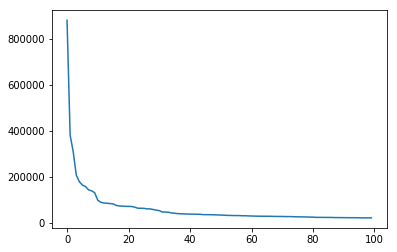

In [56]:
plt.plot(x, frequencies)

In [59]:
import numpy as np

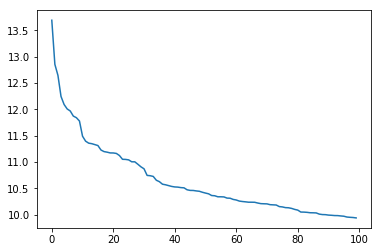

In [60]:
plt.plot(x, np.log(frequencies))

In [743]:
def prob_1(word):
    if word not in words_count: return 1/len(TOKEN)
    else:
        return words_count[word] / len(TOKEN)

In [744]:
prob_1('中国')

0.00315214197041836

In [87]:
TOKEN[:20]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停']

In [88]:
TOKEN = [str(t) for t in TOKEN]

In [72]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [89]:
TOKEN_2_GRAM[:15]

['此外自',
 '自本周',
 '本周6',
 '6月',
 '月12',
 '12日起',
 '日起除',
 '除小米',
 '小米手机',
 '手机6',
 '6等',
 '等15',
 '15款',
 '款机型',
 '机型外']

In [90]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [94]:
words_count_2.most_common(10)

[('\n新华社', 69229),
 ('2017年', 63949),
 ('外代二线', 61301),
 ('n新华社', 59794),
 ('日n', 52216),
 ('新华社照片', 50401),
 ('5月', 40062),
 ('4月', 35428),
 ('新华社记者', 30997),
 ('日在', 27782)]

In [75]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1 + word2] / len(TOKEN_2_GRAM)
    else:
        return 1/ len(TOKEN_2_GRAM)

In [91]:
prob_2('此外', '在')

9.103064662275594e-06

In [77]:
prob_2('我们', '小米')

4.716613814650567e-08

In [95]:
prob_2('新华社', '在')

2.3583069073252834e-07

In [752]:
def get_probability(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[: -1]):
        next_ = words[i + 1]
        
        probability = prob_2(word, next_) / prob_1(next_)
        
        sentence_pro *= probability
        
    return sentence_pro

In [753]:
get_probability('我今天买了6台小米手机')

3.9835397559447245e-17

In [754]:
get_probability('中国政府昨天禁止所有人购买小米手机')

2.0305660227668205e-17

In [755]:
get_probability('小明买了几瓶养乐多')

7.057769878697479e-07

In [756]:
get_probability('据新华社电，大学老师成为目前最受欢迎职业')

3.7699680409190265e-18

In [757]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probability(sen)))

sentence: 这个小猫听着一个小小的篮球 with Prb: 2.7993893842021098e-14
sentence: 这个小猫坐在这个蓝色的好看的小小的好看的小小的小小的蓝色的小猫 with Prb: 1.4951282093100883e-41
sentence: 这个蓝色的蓝色的女人看见这个小猫 with Prb: 4.593703763617066e-20
sentence: 这个女人听着这个小小的桌子 with Prb: 2.3504790797987957e-13
sentence: 这个女人听着一个好看的篮球 with Prb: 4.337076085098277e-18
sentence: 一个篮球看见这个好看的篮球 with Prb: 1.6946574695004887e-18
sentence: 这个小小的小猫看见这个蓝色的桌子 with Prb: 6.346483890111245e-17
sentence: 一个小小的蓝色的篮球听着一个好看的蓝色的小猫 with Prb: 1.9350236534447086e-28
sentence: 这个女人看见这个女人 with Prb: 6.670019645644677e-10
sentence: 一个小小的小小的女人坐在一个小猫 with Prb: 5.5443084506960434e-14


In [758]:
need_compared = [
    "今天是个好日子，不适合减肥 今天不适合减肥，是个好日子",
    "晚上去蹦迪吗 去蹦迪吗晚上",
    "要一杯焦糖布丁奶茶 焦糖布丁奶茶要一杯",
    "你可真是个美丽的小姑娘 小姑娘你可真是个美丽的",
    "我是世界上最帅的男人 世界上最帅的男人是我"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    
    print('{} is more possible to be a real sentence'.format(better))
    print('-'*3 + '{} with probability of {}'.format(s1, p1))
    print('-'*3 + '{} with probability of {}'.format(s2, p2))

今天是个好日子，不适合减肥 is more possible to be a real sentence
---今天是个好日子，不适合减肥 with probability of 8.222454225321402e-15
---今天不适合减肥，是个好日子 with probability of 5.813856522954528e-16
去蹦迪吗晚上 is more possible to be a real sentence
---晚上去蹦迪吗 with probability of 7.452179768078509e-08
---去蹦迪吗晚上 with probability of 1.7335215812056587e-07
要一杯焦糖布丁奶茶 is more possible to be a real sentence
---要一杯焦糖布丁奶茶 with probability of 2.3241169301428955e-05
---焦糖布丁奶茶要一杯 with probability of 2.574533191946196e-09
你可真是个美丽的小姑娘 is more possible to be a real sentence
---你可真是个美丽的小姑娘 with probability of 9.082477430262741e-14
---小姑娘你可真是个美丽的 with probability of 7.217208806800029e-17
我是世界上最帅的男人 is more possible to be a real sentence
---我是世界上最帅的男人 with probability of 2.394664251423673e-13
---世界上最帅的男人是我 with probability of 1.688308616249919e-16


## part 2 基础理论部分 

#### 0. Can you come up out 3 sceneraies which use AI methods?

Self driving, service robot, auto composition

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Some professional people share the codes they wrote on github which could be very useful, and we could fork or star other people' repositories to learn from them or even try to make some improvements. And we could also build our own repository to record or share something.
Jupyter is a very convinient tool to demonstrate the function of a piece of code
and Pycharm has a srtrong function on code development

#### 2. What's the Probability Model?

 A probability model is a mathematical representation of a random phenomenon. （from Internet）

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Flood prediction, stock prediction, water contamination prediction

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

We use probability is because most events taking place in the world are probability based.
Parsing and pattern match are logic based, and they are diverse and unstructured as well, which makes it difficult to realize through programming.

#### 5. What's the Language Model;


A statistical language model is a probability distribution over sequences of words.(from wikipedia)

#### 6. Can you came up with some sceneraies at which we could use Language Model?

Voice recognition, junk mail recognition, auto translation

#### 7. What's the 1-gram language model;

The probability of a word appearing in an sentence is only dependent on itself without considering other factors.

#### 8. What's the disadvantages and advantages of 1-gram language model;

Advantages: 1-gram language model  is relatively easy to build and needs less data to calibrate campared to 2-gram or higher-gram language model.
Disadvantages: There will be a large difference between the sentence generated by 1-gram language model and a real sentence. The combination of two words that have high probability could be reasonable in 1-gram model whereas the truth is that they rarely show up together.

#### 9. What't the 2-gram models;

A 2-gram language model considers the probability of a word's appearance depends on its previous one word (or its latter one word). (My understanding)

It is assumed that the probability of observing the 1 word in the context history of the preceding words can be approximated by the probability of observing it in the shortened context history of the preceding 1 word (2nd order Markov property). (wikipedia )

## part 3 编程实践部分

#### 1. 设计自己的句子生成器 

第一个语法

In [632]:
guest = """
sentence = 招呼 , 主语 时间 行为
招呼 = 您好 | 你好
主语 = 我 | 我 亲人
亲人 = 二舅 | 小姨妈 | 五大爷
时间 = 明天 | 后天 | 下周三 | 下周五
行为 = 想要订 数量 数字 人的 房间
数量 = 一间 | 三间 | 五间
数字 = 2 | 6 | 8 | 10 | 20
房间 = 包房 | 客房 | 会议室
"""

 第二个语法

In [633]:
waitor = """
order = 时间 饭店 提供 菜系 
时间 = 今天 | 本周 | 本月 | 本季度
饭店 = 城市 店名 街道 分店
城市 = 上海 | 北京 | 成都 | 大连
店名 = 海底捞 | 杨国福 | 全聚德 | 瑞福园
街道 = 山西路 | 武汉街 | 成都南路
提供 = 限时推出 | 全新推出 | 限量提供 | 招牌是
菜系 = 地域 口味 味儿的 菜名 , 做菜的 调味料 产自 自然
调味料 = 醋 | 酱油 | 小葱 | 大蒜 | 香菜
地域 = 山西 | 山东 | 四川 | 美国 | 法国
口味 = 麻辣 | 咸香 | 蒜香 | 糖醋 | 椒盐
菜名 = 烤鱼 | 夫妻肺片 | 八宝鸭 | 九转大肠 | 拔丝香蕉
自然 = 泰国 | 新加坡 | 印度尼西亚 | 日本
"""

In [634]:
grammar_waitor = create_grammar(waitor, split='=')
grammar_guest = create_grammar(guest, split='=')

In [635]:
generate(gram=grammar_guest, target = 'sentence')

'你好,我下周三想要订三间20人的包房'

In [636]:
for i in range(10):
    print(generate(gram=grammar_guest, target = 'sentence'))

你好,我小姨妈后天想要订一间10人的客房
你好,我二舅下周五想要订一间8人的客房
你好,我明天想要订三间8人的包房
您好,我下周五想要订三间2人的包房
你好,我小姨妈明天想要订一间6人的会议室
您好,我小姨妈后天想要订一间2人的客房
你好,我小姨妈下周三想要订三间20人的会议室
你好,我小姨妈明天想要订一间10人的客房
您好,我下周五想要订一间6人的会议室
您好,我后天想要订五间20人的包房


In [197]:
for i in range(10):
    print(generate(gram=grammar_waitor, target = 'order'))

本周成都全聚德山西路分店限时推出法国椒盐味儿的拔丝香蕉,做菜的醋产自日本
本季度北京全聚德武汉街分店限时推出法国蒜香味儿的八宝鸭,做菜的酱油产自印度尼西亚
本周北京海底捞武汉街分店招牌是法国咸香味儿的烤鱼,做菜的香菜产自泰国
本季度成都全聚德山西路分店限量提供山东糖醋味儿的夫妻肺片,做菜的香菜产自印度尼西亚
今天北京全聚德山西路分店招牌是四川蒜香味儿的九转大肠,做菜的酱油产自泰国
本周北京瑞福园武汉街分店全新推出山西糖醋味儿的九转大肠,做菜的小葱产自新加坡
今天大连瑞福园武汉街分店全新推出四川椒盐味儿的夫妻肺片,做菜的小葱产自日本
本周北京杨国福山西路分店全新推出法国蒜香味儿的烤鱼,做菜的香菜产自新加坡
今天大连瑞福园成都南路分店全新推出美国咸香味儿的烤鱼,做菜的大蒜产自新加坡
本季度成都海底捞成都南路分店限量提供美国糖醋味儿的八宝鸭,做菜的香菜产自新加坡


In [659]:
def  generate_n(g, t, n):
    grammar = create_grammar(g, split='=')

    sen = [generate(gram=grammar, target=t) for i in range(n)]
    
    return sen

In [660]:
generate_n(waitor,'order', 6)

['今天上海杨国福武汉街分店限时推出美国糖醋味儿的九转大肠,做菜的醋产自印度尼西亚',
 '本季度成都瑞福园山西路分店招牌是四川椒盐味儿的夫妻肺片,做菜的大蒜产自印度尼西亚',
 '本周成都海底捞山西路分店招牌是山东麻辣味儿的九转大肠,做菜的大蒜产自新加坡',
 '今天北京瑞福园武汉街分店全新推出美国麻辣味儿的拔丝香蕉,做菜的小葱产自新加坡',
 '今天上海海底捞武汉街分店招牌是美国糖醋味儿的夫妻肺片,做菜的香菜产自日本',
 '本季度上海全聚德武汉街分店招牌是山东椒盐味儿的烤鱼,做菜的酱油产自泰国']

#### 2. 使用新数据源完成语言模型的训练 

In [324]:
file_path = '/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part1/movie_comments.csv'

In [331]:
movie_comment = pd.read_csv(file_path)#, encoding = 'gb18030')

/Users/zhangtingshuo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [332]:
movie_comment.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [339]:
comment_articles = movie_comment['comment'].tolist()

In [340]:
len(comment_articles)

261497

In [374]:
''.join(token(comment_articles[9]))

'15100吴京的冷峰在这部里即像成龙又像杰森斯坦森但体制外的同类型电影主角总是代表个人无能的政府需要求助于这些英雄才能解决难题体现的是个人的价值所以主旋律照抄这种模式实际上是有问题的我们以前嘲笑个人英雄主义却没想到捆绑爱国主义的全能战士更加难以下咽'

In [375]:
comment_articles[9]

'15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个人，无能的政府需要求助于这些英雄才能解决难题，体现的是个人的价值，所以主旋律照抄这种模式实际上是有问题的。我们以前嘲笑个人英雄主义，却没想到捆绑爱国主义的全能战士更加难以下咽。'

In [382]:
comment_clean = [''.join(token(str(a))) for a in comment_articles]

In [383]:
len(comment_clean)

261497

In [385]:
with open('movie_comment.txt','w') as f:
    for a in comment_clean:
        f.write(a + '\n')

In [390]:
TOKEN_comment = []

In [391]:
for i, line in enumerate((open('movie_comment.txt'))):
    if i % 1000 == 0: print(i)
        
    TOKEN_comment += cut(line)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [392]:
words_count_comment = Counter(TOKEN_comment)

In [393]:
words_count_comment.most_common(10)

[('的', 328262),
 ('\n', 261497),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065)]

In [395]:
TOKEN_comment = [str(t) for t in TOKEN_comment]

In [396]:
TOKEN_comment_2_gram = [''.join(TOKEN_comment[i: i+2]) for i in range(len(TOKEN_comment[:-2]))]

In [397]:
TOKEN_comment_2_gram[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [398]:
words_count_2_comment = Counter(TOKEN_comment_2_gram)

In [443]:
def prob_1_comment(word):
    if word in words_count_comment:
        return words_count_comment[word] / len(TOKEN_comment)
    else:
        return 1 / len(TOKEN_comment)

In [444]:
def prob_2_comment(word1, word2):
    if word1 + word2 in words_count_2_comment: return words_count_2_comment[word1 + word2] / len(TOKEN_comment_2_gram)
    else:
        return 1 / len(TOKEN_comment_2_gram)

In [445]:
prob_2_comment('看', '电影')

0.00011048426199038344

In [759]:
def get_probability_comment(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        probabilty = prob_2_comment(word, words[i+1]) / prob_1_comment(words[i+1])
        sentence_pro *= probabilty
        
    return sentence_pro

In [760]:
get_probability_comment('我的天啊，你就是一坨屎')

3.9247120586315274e-14

In [761]:
get_probability_comment('想问天你在哪里，我想问问我自己')

5.595613506484272e-20

In [762]:
get_probability_comment('小明今天抽奖抽到500亿美元大奖')

6.756255231741785e-09

In [763]:
for sen in generate_n(waitor, 'order', 6):
    print('Sentence:{} has the probability of {} to be real'. format(sen, get_probability_comment(sen)))

Sentence:今天成都杨国福成都南路分店全新推出法国椒盐味儿的拔丝香蕉,做菜的香菜产自日本 has the probability of 1.5853004853493792e-32 to be real
Sentence:本周大连瑞福园成都南路分店限量提供四川麻辣味儿的八宝鸭,做菜的醋产自泰国 has the probability of 6.861356721277977e-24 to be real
Sentence:今天大连海底捞成都南路分店全新推出山东糖醋味儿的夫妻肺片,做菜的醋产自新加坡 has the probability of 3.7820989709616994e-27 to be real
Sentence:今天北京杨国福山西路分店限量提供山西椒盐味儿的拔丝香蕉,做菜的醋产自印度尼西亚 has the probability of 2.64590061587234e-21 to be real
Sentence:本周上海瑞福园山西路分店限时推出四川咸香味儿的九转大肠,做菜的香菜产自日本 has the probability of 1.2447599026663031e-28 to be real
Sentence:本周大连海底捞成都南路分店限量提供美国麻辣味儿的拔丝香蕉,做菜的醋产自泰国 has the probability of 1.912200994696799e-29 to be real


#### 3. 获得最优质的语言

In [764]:
def generate_best(gram, target, n):
    w = []
    grammar = create_grammar(gram, split='=')
    for i in range(n):
        sen = generate(grammar, target)
        w.append((sen, get_probability_comment(sen)))
    best_sen = sorted(w, key=lambda x: x[1], reverse=True)
    print('The most realistic sentence would be {}, and the probability is {}'.format(best_sen[0][0],best_sen[0][1] ))
    return best_sen

In [770]:
generate_best(guest, 'sentence', 20)

The most realistic sentence would be 您好,我下周三想要订三间8人的包房, and the probability is 1.3096916816717017e-14


[('您好,我下周三想要订三间8人的包房', 1.3096916816717017e-14),
 ('你好,我下周三想要订五间8人的客房', 1.3096916816717017e-14),
 ('您好,我下周三想要订五间2人的客房', 8.738541836112351e-15),
 ('你好,我下周五想要订五间6人的客房', 2.858157084899876e-15),
 ('您好,我下周三想要订五间2人的会议室', 1.2483631194446215e-15),
 ('你好,我下周五想要订三间10人的客房', 1.2339905177404892e-15),
 ('您好,我下周三想要订五间10人的会议室', 1.2339905177404892e-15),
 ('您好,我下周五想要订一间2人的会议室', 4.147385778885785e-18),
 ('您好,我小姨妈后天想要订五间2人的包房', 3.4262643140652465e-20),
 ('您好,我后天想要订三间2人的会议室', 1.9578644982726575e-20),
 ('您好,我小姨妈明天想要订五间6人的客房', 6.868468238281512e-21),
 ('您好,我二舅明天想要订三间8人的包房', 4.496191801867573e-21),
 ('你好,我小姨妈下周五想要订五间6人的客房', 1.2240448692394422e-22),
 ('您好,我二舅下周五想要订五间6人的包房', 1.2240448692394422e-22),
 ('你好,我二舅下周五想要订五间8人的包房', 8.012762548013807e-23),
 ('您好,我五大爷后天想要订三间8人的客房', 1.2426198384549952e-23),
 ('你好,我二舅下周三想要订一间20人的会议室', 6.5317892782434855e-25),
 ('你好,我五大爷下周三想要订三间20人的客房', 4.7575787060003907e-26),
 ('您好,我五大爷下周三想要订三间10人的包房', 4.4758799668293155e-26),
 ('你好,我五大爷下周五想要订三间6人的客房', 2.961997300497658e-26)]

这个模型有什么问题？你准备如何提升？